# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are recommended to create your own notebook from scratch.

> Make sure to include markdown-based text commenting and explaining each step you perform.

# 1 - Extraction

In [14]:
%pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('fintech.csv')

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27030 entries, 0 to 27029
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            27030 non-null  object        
 1   emp_title              24734 non-null  object        
 2   emp_length             25166 non-null  category      
 3   home_ownership         27030 non-null  object        
 4   annual_inc             27030 non-null  float64       
 5   annual_inc_joint       1929 non-null   float64       
 6   verification_status    27030 non-null  object        
 7   zip_code               27030 non-null  object        
 8   addr_state             27030 non-null  object        
 9   avg_cur_bal            27030 non-null  float64       
 10  tot_cur_bal            27030 non-null  float64       
 11  loan_id                27030 non-null  int64         
 12  loan_status            27030 non-null  object        
 13  l

In [8]:
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
                                         Customer Id             Emp Title  \
0  YidceDkxLlx4YWE5XHhjNyRGV1x4ODlceDFlXHg5M1x4MD...  Deputy Tax Collector   
1  YiJceDFlXHhkZlx4ZjVceGYxXHhiNFtceGU5XHhjZFx4MG...                   CEO   
2  YidceDBjP1x4YTM+XHg4N1tceGNma1x4YTVceDg1OFx4Zj...                 SALES   
3  YidceGIzXHhkMnBceDFjXHhjYlx4ZGFceDFmL1x4ODZGb1...    CSX Transportation   
4  Yic6XHhiNlx4YTZceGY4XHgxMFx4OGZTXHgxY1x4Y2ZceD...               teacher   

  Emp Length Home Ownership  Annual Inc  Annual Inc Joint Verification Status  \
0  10+ years       MORTGAGE     47000.0               NaN     Source Verified   
1  10+ years            OWN    120000.0               NaN     Source Verified   
2    7 years            OWN     95000.0               NaN            Verified   
3  10+ years       MORTGAGE    110000.0               NaN     Source Verified   
4    8 years       MORTGAGE     35000.0               NaN            Verified   

  Zip Code A

In [9]:
print("\nBasic statistics of numerical columns:")
print(df.describe())


Basic statistics of numerical columns:
         Annual Inc  Annual Inc Joint    Avg Cur Bal   Tot Cur Bal  \
count  2.703000e+04       1929.000000   27030.000000  2.703000e+04   
mean   8.092220e+04     131749.175388   13728.140696  1.453223e+05   
std    1.062812e+05      70128.314211   16804.140775  1.639025e+05   
min    2.230000e+02      28000.000000       0.000000  0.000000e+00   
25%    4.784700e+04      86999.000000    3120.000000  2.964825e+04   
50%    6.700000e+04     118000.000000    7374.500000  7.957350e+04   
75%    9.600000e+04     157000.000000   19082.750000  2.178030e+05   
max    8.900060e+06     900000.000000  524933.000000  2.792401e+06   

             Loan Id   Loan Amount  Funded Amount      Int Rate         Grade  
count   27030.000000  27030.000000   27030.000000  25757.000000  27030.000000  
mean   135676.515871  15472.783019   15472.783019      0.131302     10.961561  
std     78209.620647   9486.873301    9486.873301      0.048966      6.336895  
min      

In [27]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
emp_title                 2296
emp_length                1864
home_ownership               0
annual_inc                   0
annual_inc_joint         25101
verification_status          0
zip_code                     0
addr_state                   0
avg_cur_bal                  0
tot_cur_bal                  0
loan_id                      0
loan_status                  0
loan_amount                  0
state                        0
funded_amount                0
term                         0
int_rate                  1273
grade                        0
issue_date                   0
pymnt_plan                   0
type                         0
purpose                      0
description                245
loan_to_balance_ratio        0
dtype: int64


In [26]:
print("\nColumn names:")
print(df.columns)


Column names:
Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description',
       'loan_to_balance_ratio'],
      dtype='object')


In [12]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Customer Id             object
Emp Title               object
Emp Length              object
Home Ownership          object
Annual Inc             float64
Annual Inc Joint       float64
Verification Status     object
Zip Code                object
Addr State              object
Avg Cur Bal            float64
Tot Cur Bal            float64
Loan Id                  int64
Loan Status             object
Loan Amount            float64
State                   object
Funded Amount          float64
Term                    object
Int Rate               float64
Grade                    int64
Issue Date              object
Pymnt Plan                bool
Type                    object
Purpose                 object
Description             object
dtype: object


In [13]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {column}:")
    print(df[column].unique())


Unique values in Customer Id:
['YidceDkxLlx4YWE5XHhjNyRGV1x4ODlceDFlXHg5M1x4MDU0XHgxY1x4OTFceGY4XHg4Y3w4XHg4NVx4YzJceGMzXHgxY1x4OThceDE1XHg5MD5ceGMxXHQxXHhhOFx4ZTQn'
 'YiJceDFlXHhkZlx4ZjVceGYxXHhiNFtceGU5XHhjZFx4MGVceGFlXHgxYjFceGI0XHhjZlx4ZTc5XHhiNVx4ZmVfNFx4YzVGXHhiY1JceDkxXHgwY1x4ZmZceGE1e1x4ZjEnXHg4NCI='
 'YidceDBjP1x4YTM+XHg4N1tceGNma1x4YTVceDg1OFx4ZjJ3XHhhNlx4ZTd8aVx4MGNceGIxXHg4OVx4ZmFtI1x4YzBceGE4XHhlOFx4ZjVceGM4d1x4MWNceDA3XHhjNCc='
 ...
 'Yidpc1x4YzBceDkxXHQ6XHgwNVx4MWRceGJhV3ZceDE4XHg4ME1ceDg3XHg5ZVx4ZjNceGYxXHg4Mlx4ZWNwb1x4ODA7XHhmOVx4ZDhceDA0XHg5MFx4ZDRceDdmXHhmNmYn'
 'YichXHgwN0BceGI4XHhmZlx4OTBceDAxXHg5N35ceGE2LVx4ZTcvXHhjMk1ceDllLVxyTVx4ODlceGViXHhjMlx4OTJNXHgxOVx4MGVceGI1XHg4N1x4ZWRceGQxZGon'
 'YiddXHgwMFx4OGI/Jm0mXHhhNil3TFx4MWNDa1x4YjAhVFx4OWFceGU2XHg4OFx4MGJceGMyXHgwNjpceDdmXHhlMlx4ZmFceDAyRlx4YWVTXHhkNSc=']

Unique values in Emp Title:
['Deputy Tax Collector' 'CEO' 'SALES' ... 'Medication Coordinator '
 'Associate Director of College Counseling'
 'Clinical Laborat

# 2- EDA

Is there any relationship betweem Annual income and security grade?

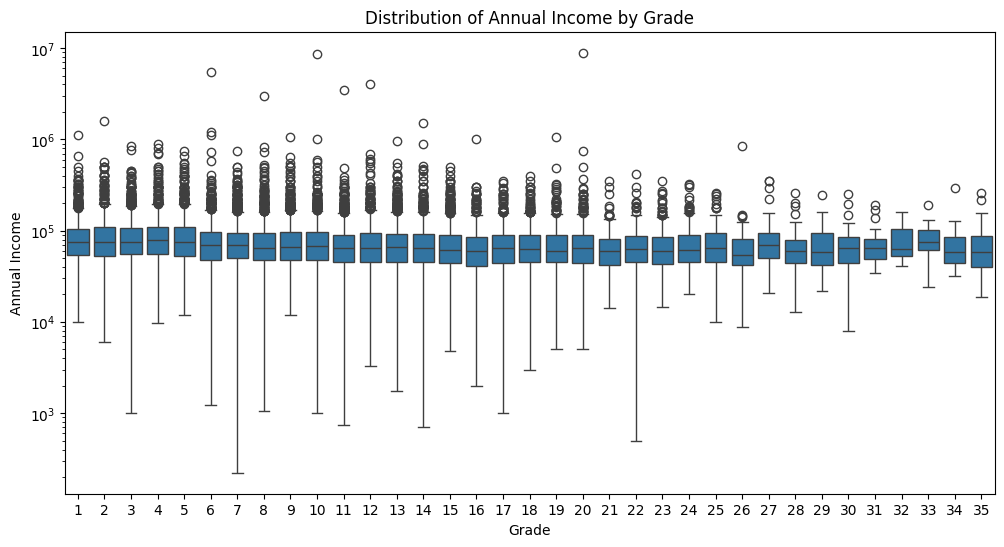

Average Annual Income by Grade:
Grade
4     95161.730669
5     92550.908183
3     92075.986716
2     91380.639913
1     88453.029393
20    86359.253701
10    84466.050254
6     84394.709237
33    83646.789474
27    83387.863014
7     81027.901476
9     80944.810642
8     80558.136195
12    79931.151509
32    77597.277375
13    77119.919800
14    77036.791229
11    75904.261672
35    75336.285714
31    74321.913043
17    74010.143856
25    73891.895889
24    73827.199594
18    72942.694965
15    72934.529120
22    72710.955094
34    72427.555556
19    71956.747007
26    71527.813853
29    70915.782967
16    70860.730571
23    69993.021679
30    68462.615826
28    67568.142026
21    67075.004705
Name: Annual Inc, dtype: float64

Correlation between Grade and Annual Income: -0.05


In [15]:


plt.figure(figsize=(12, 6))
sns.boxplot(x='Grade', y='Annual Inc', data=df)
plt.title('Distribution of Annual Income by Grade')
plt.xlabel('Grade')
plt.ylabel('Annual Income')
plt.yscale('log')  # Using log scale for better visualization of income distribution
plt.show()

# Calculate average income for each grade
avg_income_by_grade = df.groupby('Grade')['Annual Inc'].mean().sort_values(ascending=False)
print("Average Annual Income by Grade:")
print(avg_income_by_grade)

# Correlation between Grade and Annual Income
correlation = df['Grade'].corr(df['Annual Inc'])
print(f"\nCorrelation between Grade and Annual Income: {correlation:.2f}")

the relationship between grade and interest rate

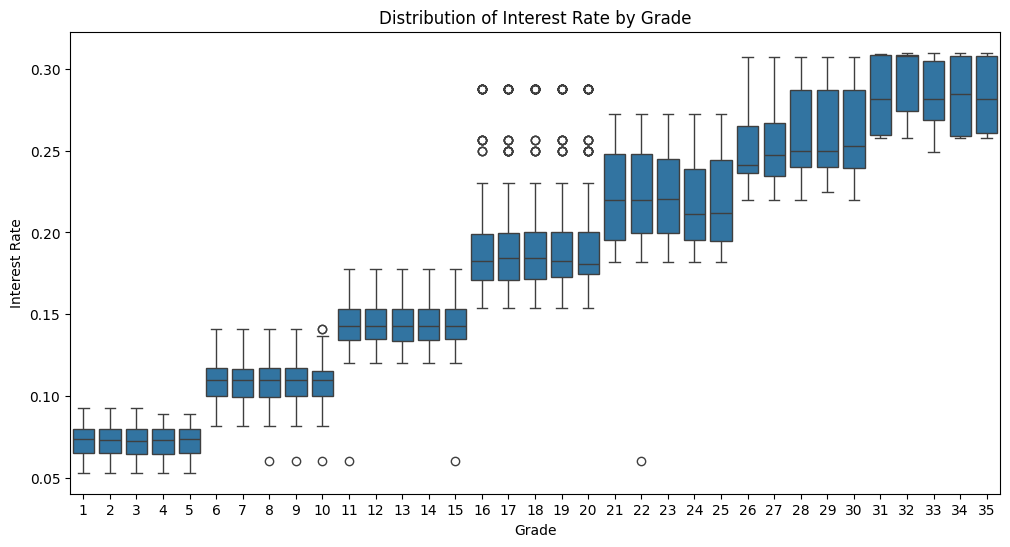

Average Interest Rate by Grade:
Grade
32    0.291212
35    0.285152
31    0.283930
33    0.282661
34    0.281936
28    0.260538
29    0.259953
30    0.258758
27    0.252803
26    0.252765
22    0.222935
23    0.221980
21    0.221376
25    0.218745
24    0.217944
18    0.189823
19    0.188625
20    0.188604
17    0.188293
16    0.186667
13    0.144363
12    0.144346
15    0.144276
11    0.144071
14    0.143949
6     0.109090
9     0.108506
7     0.108405
8     0.108397
10    0.108197
2     0.072688
5     0.072582
1     0.072436
3     0.072421
4     0.072113
Name: Int Rate, dtype: float64

Correlation between Grade and Interest Rate: 0.92


In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grade', y='Int Rate', data=df)
plt.title('Distribution of Interest Rate by Grade')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.show()

# Calculate average interest rate for each grade
avg_rate_by_grade = df.groupby('Grade')['Int Rate'].mean().sort_values(ascending=False)
print("Average Interest Rate by Grade:")
print(avg_rate_by_grade)

# Correlation between Grade and Interest Rate
correlation = df['Grade'].corr(df['Int Rate'])
print(f"\nCorrelation between Grade and Interest Rate: {correlation:.2f}")

 the relationship between home ownership and annual income, and how it differs by state

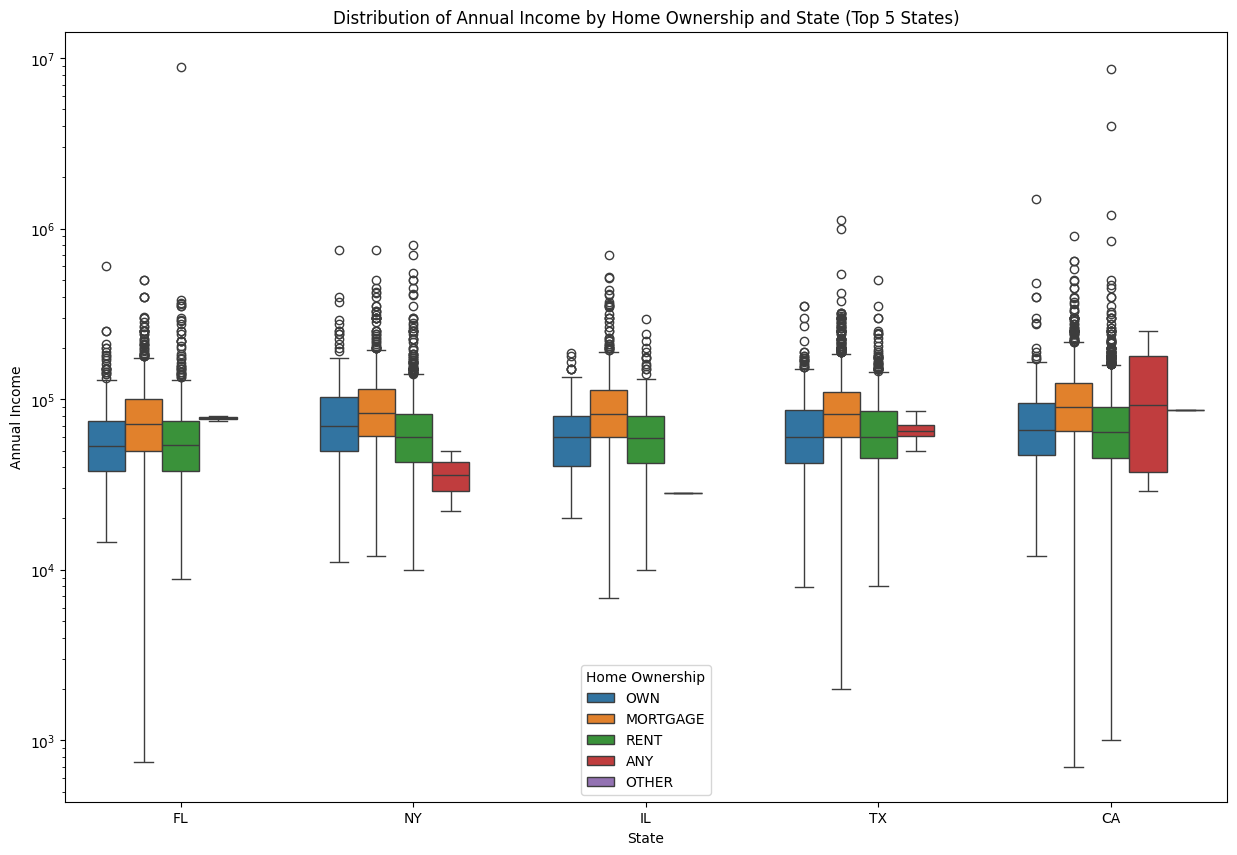

Median Annual Income by Home Ownership and State (Top 5 States):
Home Ownership      ANY  MORTGAGE    OTHER      OWN     RENT
State                                                       
CA              92500.0   90000.0  87000.0  66000.0  64374.0
TX              65220.0   82000.0      NaN  60000.0  60000.0
NY              36040.0   83500.0      NaN  70000.0  60000.0
FL              77500.0   72000.0      NaN  53250.0  54000.0
IL              28056.0   82000.0      NaN  59850.0  59205.0


In [17]:
# Select top 5 states by number of loans
top_5_states = df['State'].value_counts().nlargest(5).index

plt.figure(figsize=(15, 10))
sns.boxplot(x='State', y='Annual Inc', hue='Home Ownership', 
            data=df[df['State'].isin(top_5_states)])
plt.title('Distribution of Annual Income by Home Ownership and State (Top 5 States)')
plt.xlabel('State')
plt.ylabel('Annual Income')
plt.yscale('log')
plt.legend(title='Home Ownership')
plt.show()

# Calculate median income by home ownership and state
median_income = df.groupby(['State', 'Home Ownership'])['Annual Inc'].median().unstack()
print("Median Annual Income by Home Ownership and State (Top 5 States):")
print(median_income.loc[top_5_states])

 the relation between employment length and security grade

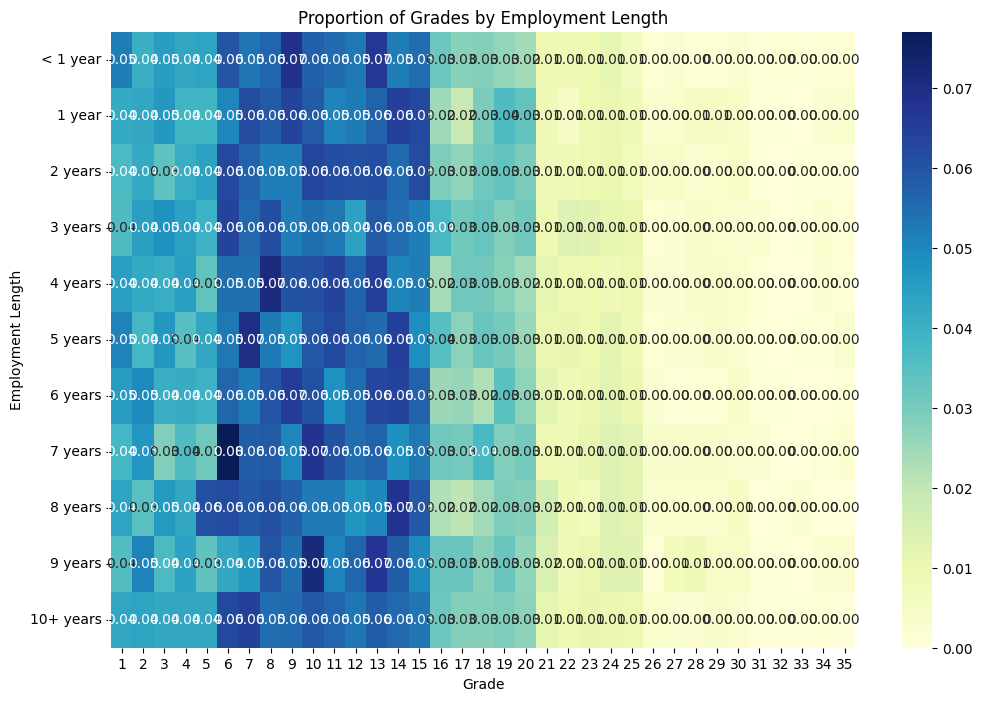

Chi-square statistic: 342.11
p-value: 0.4577


In [18]:
# Convert Emp Length to categorical
df['Emp Length'] = pd.Categorical(df['Emp Length'], 
                                  categories=['< 1 year', '1 year', '2 years', '3 years', 
                                              '4 years', '5 years', '6 years', '7 years', 
                                              '8 years', '9 years', '10+ years'], 
                                  ordered=True)

# Create a cross-tabulation
cross_tab = pd.crosstab(df['Emp Length'], df['Grade'], normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Proportion of Grades by Employment Length')
plt.xlabel('Grade')
plt.ylabel('Employment Length')
plt.show()

# Chi-square test for independence
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(df['Emp Length'], df['Grade']))
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")

the relationships between interest rate, loan amount, term, issue date, and grade

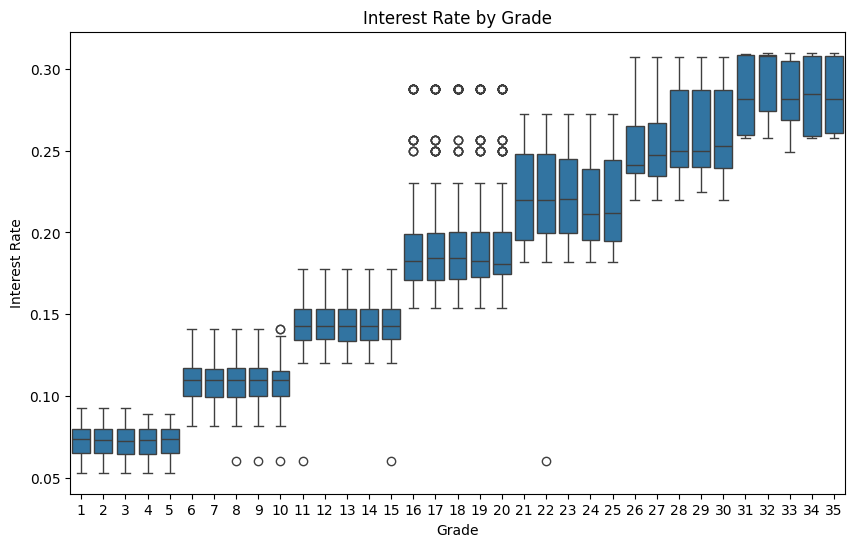

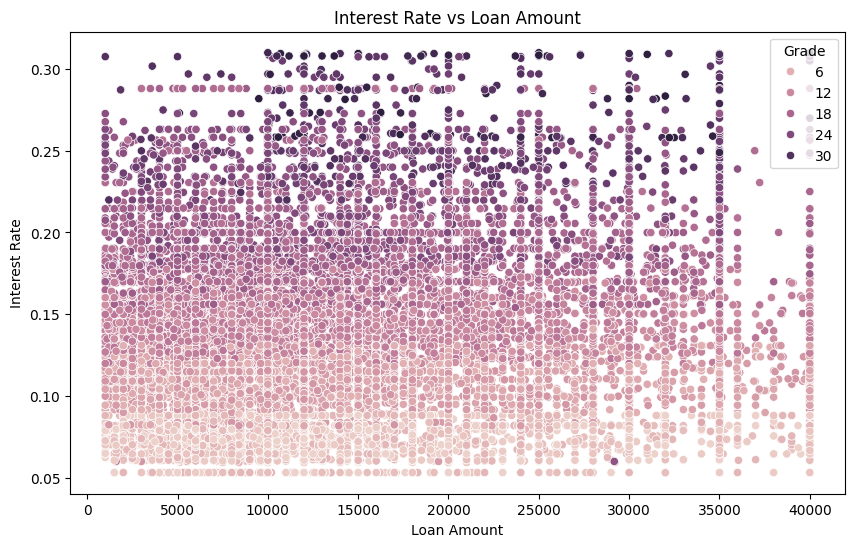

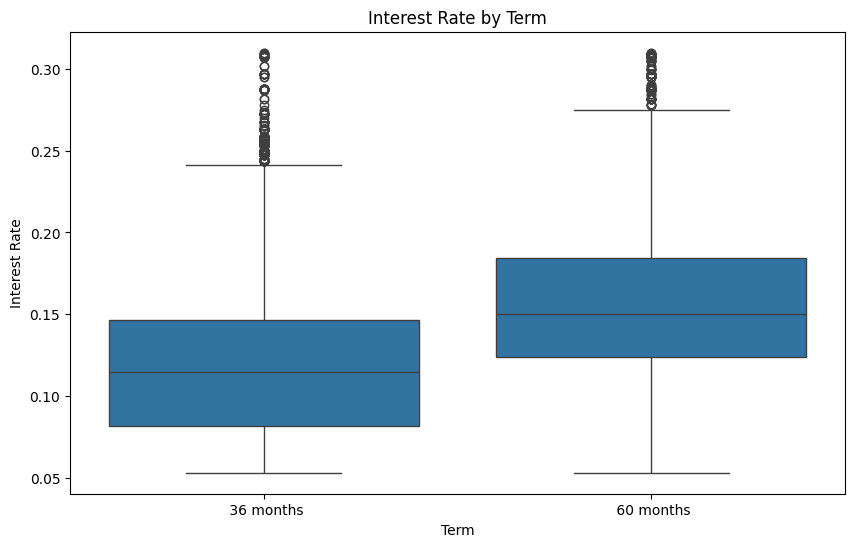

C:\Users\pc\AppData\Local\Temp\ipykernel_12976\3934093381.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Issue Date')['Int Rate'].resample('M').mean().plot()


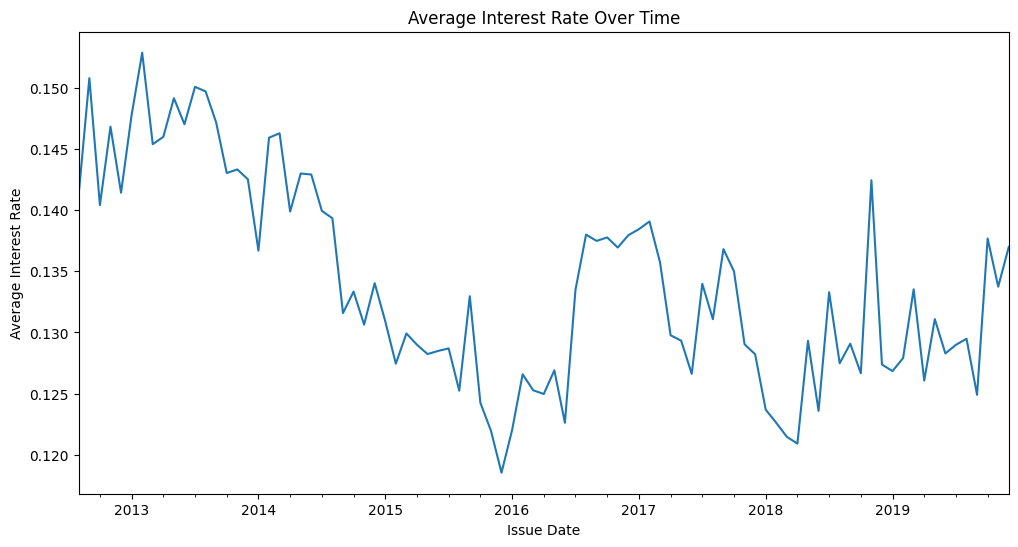

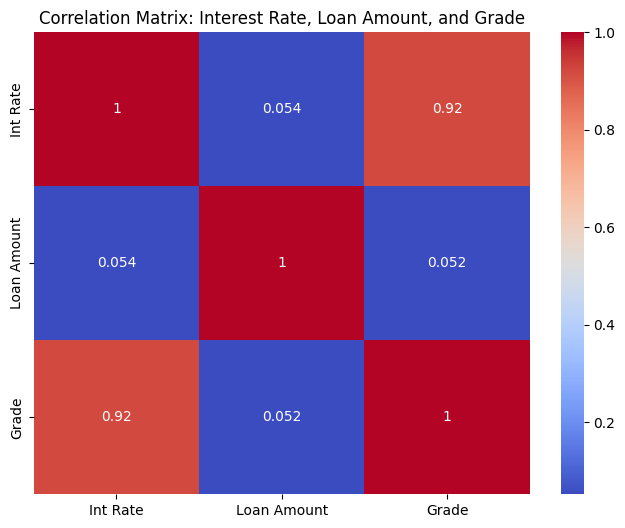

Correlation between Interest Rate and Loan Amount: 0.054142379382175365
Average Interest Rate by Term:
Term
36 months    0.120357
60 months    0.156458
Name: Int Rate, dtype: float64


In [19]:
# Convert Issue Date to datetime
df['Issue Date'] = pd.to_datetime(df['Issue Date'])

# 1. Relationship between Grade and Interest Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade', y='Int Rate', data=df)
plt.title('Interest Rate by Grade')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.show()

# 2. Relationship between Loan Amount and Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Loan Amount', y='Int Rate', hue='Grade', data=df)
plt.title('Interest Rate vs Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

# 3. Relationship between Term and Interest Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='Term', y='Int Rate', data=df)
plt.title('Interest Rate by Term')
plt.xlabel('Term')
plt.ylabel('Interest Rate')
plt.show()

# 4. Relationship between Issue Date and Interest Rate
plt.figure(figsize=(12, 6))
df.set_index('Issue Date')['Int Rate'].resample('M').mean().plot()
plt.title('Average Interest Rate Over Time')
plt.xlabel('Issue Date')
plt.ylabel('Average Interest Rate')
plt.show()

# 5. Correlation matrix
corr_matrix = df[['Int Rate', 'Loan Amount', 'Grade']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Interest Rate, Loan Amount, and Grade')
plt.show()

print("Correlation between Interest Rate and Loan Amount:", 
      df['Int Rate'].corr(df['Loan Amount']))
print("Average Interest Rate by Term:")
print(df.groupby('Term')['Int Rate'].mean())

the relationships between average current balance, total current balance, and loan amount

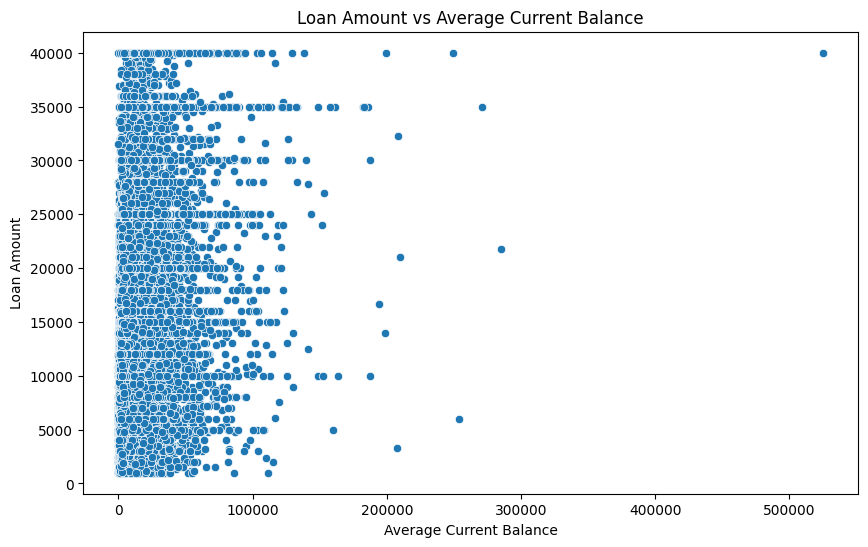

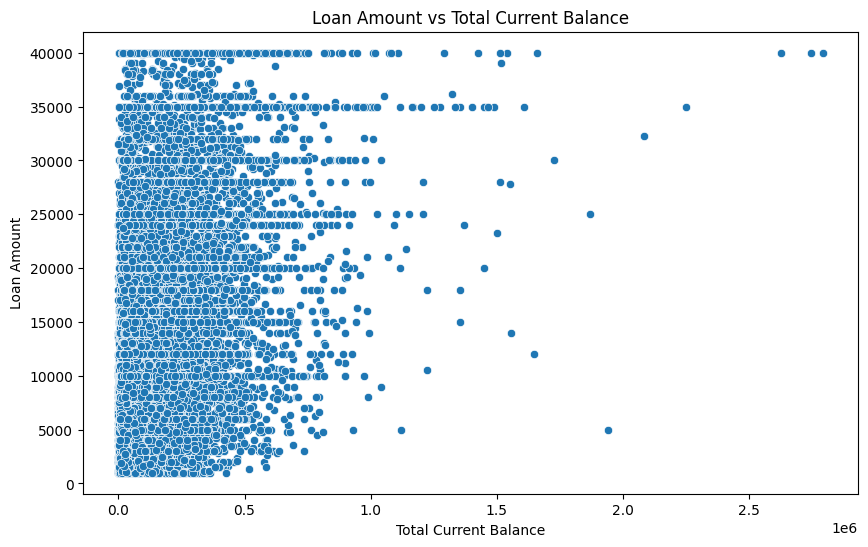

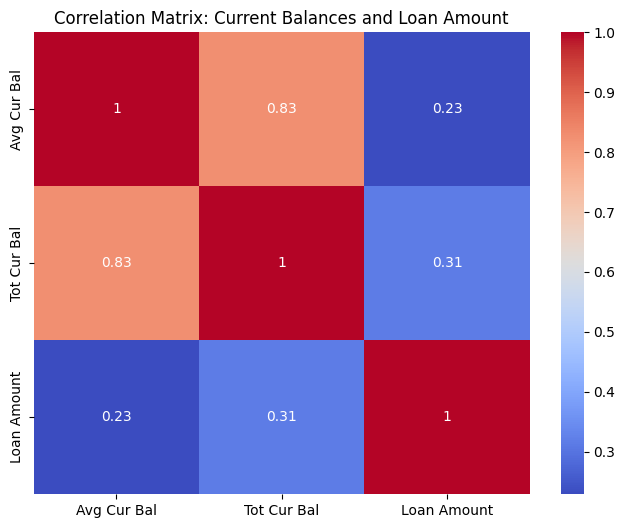

Correlation between Average Current Balance and Loan Amount: 0.22876125755745105
Correlation between Total Current Balance and Loan Amount: 0.3145638735123573


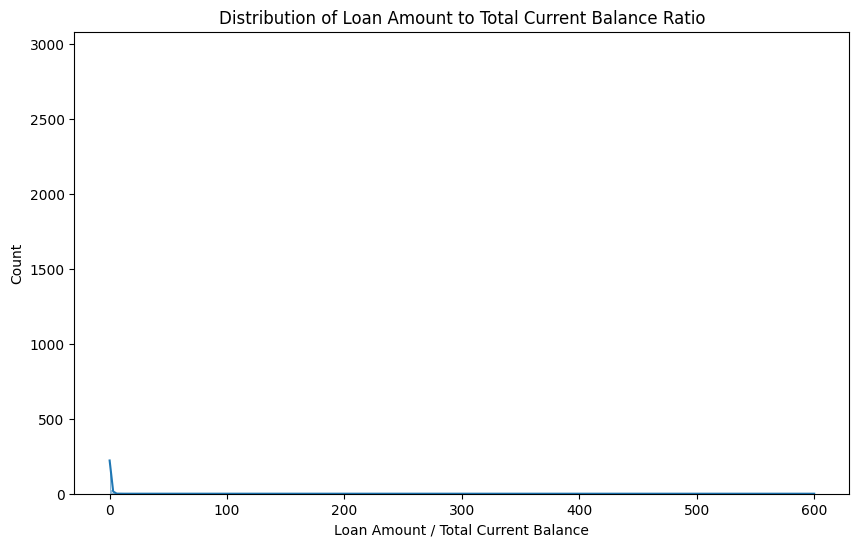

Median Loan Amount to Total Current Balance Ratio: 0.15556732980208732


In [20]:

# 1. Relationship between Average Current Balance and Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg Cur Bal', y='Loan Amount', data=df)
plt.title('Loan Amount vs Average Current Balance')
plt.xlabel('Average Current Balance')
plt.ylabel('Loan Amount')
plt.show()

# 2. Relationship between Total Current Balance and Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tot Cur Bal', y='Loan Amount', data=df)
plt.title('Loan Amount vs Total Current Balance')
plt.xlabel('Total Current Balance')
plt.ylabel('Loan Amount')
plt.show()

# 3. Correlation analysis
corr_matrix = df[['Avg Cur Bal', 'Tot Cur Bal', 'Loan Amount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Current Balances and Loan Amount')
plt.show()

print("Correlation between Average Current Balance and Loan Amount:", 
      df['Avg Cur Bal'].corr(df['Loan Amount']))
print("Correlation between Total Current Balance and Loan Amount:", 
      df['Tot Cur Bal'].corr(df['Loan Amount']))

# 4. Ratio of Loan Amount to Total Current Balance
df['Loan_to_Balance_Ratio'] = df['Loan Amount'] / df['Tot Cur Bal']
plt.figure(figsize=(10, 6))
sns.histplot(df['Loan_to_Balance_Ratio'], kde=True)
plt.title('Distribution of Loan Amount to Total Current Balance Ratio')
plt.xlabel('Loan Amount / Total Current Balance')
plt.show()

print("Median Loan Amount to Total Current Balance Ratio:", 
      df['Loan_to_Balance_Ratio'].median())

What is the distribution of the loan amounts?

What is the default rate by state?

What are the average income levels across different employment titles?

# 3 - Cleaning Data

## Tidying up column names

In [22]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

## setting customer_id as PK

In [24]:
df.set_index('customer_id', inplace=True)

## Observe inconsistent data

### Remove Capping

In [25]:
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].apply(lambda x: x.str.lower())

In [33]:
df.head(10)  # Shows the first 5 rows of the dataframe

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,...,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,loan_to_balance_ratio
customer_id,,,,,,,,,,,,,,,,,,,,,
YidceDkxLlx4YWE5XHhjNyRGV1x4ODlceDFlXHg5M1x4MDU0XHgxY1x4OTFceGY4XHg4Y3w4XHg4NVx4YzJceGMzXHgxY1x4OThceDE1XHg5MD5ceGMxXHQxXHhhOFx4ZTQn,deputy tax collector,10+ years,mortgage,47000.0,NaN,source verified,270xx,nc,27762.0,166572.0,...,3500.0,36 months,0.0881,2,2019-12-19,False,individual,home_improvement,home improvement,0.021012
YiJceDFlXHhkZlx4ZjVceGYxXHhiNFtceGU5XHhjZFx4MGVceGFlXHgxYjFceGI0XHhjZlx4ZTc5XHhiNVx4ZmVfNFx4YzVGXHhiY1JceDkxXHgwY1x4ZmZceGE1e1x4ZjEnXHg4NCI=,ceo,10+ years,own,120000.0,NaN,source verified,342xx,fl,7225.0,65021.0,...,10000.0,36 months,0.1541,19,2015-11-15,False,individual,home_improvement,home improvement,0.153796
YidceDBjP1x4YTM+XHg4N1tceGNma1x4YTVceDg1OFx4ZjJ3XHhhNlx4ZTd8aVx4MGNceGIxXHg4OVx4ZmFtI1x4YzBceGE4XHhlOFx4ZjVceGM4d1x4MWNceDA3XHhjNCc=,sales,7 years,own,95000.0,NaN,verified,481xx,mi,2756.0,63384.0,...,10000.0,60 months,0.1899,18,2016-12-16,False,individual,debt_consolidation,debt consolidation,0.157769
YidceGIzXHhkMnBceDFjXHhjYlx4ZGFceDFmL1x4ODZGb1x4Y2M0XHhhOVx4MTBceGE2XHhkM1x4MGIgT1x4YjRCXHhhZmBceDA2SFx4OTNceDg0XHhhN1x4ODRceDk2USc=,csx transportation,10+ years,mortgage,110000.0,NaN,source verified,124xx,ny,32567.0,195404.0,...,35000.0,36 months,0.1114,10,2012-12-12,False,individual,debt_consolidation,debt consolidation,0.179116
Yic6XHhiNlx4YTZceGY4XHgxMFx4OGZTXHgxY1x4Y2ZceDg2b1x4OWRceGY5XHhhYVRceDhhXHhjMVx4OWZceDg1XHg5Yj9FLFx4YWJceDFiXHgwNlx4ZmFceDgzSVx4OGJceGE1XHgwZSc=,teacher,8 years,mortgage,35000.0,NaN,verified,605xx,il,47782.0,286690.0,...,9750.0,36 months,0.1559,11,2016-10-16,False,individual,other,other,0.034009
YidceGU5XHgwZVx4ZmZceDk2XHhlOVx4MDA1XHgxNX1ceDg2XHhkNFxcblx4YjhceGY4UnpceGExdVx4ZTVgZFx4YmN1XHgwMVx4OWVceDA1XHhhMiVceGIwNVx4MDgn,sales manager,2 years,mortgage,120000.0,NaN,source verified,787xx,tx,27991.0,251921.0,...,8000.0,36 months,NaN,4,2016-04-16,False,individual,credit_card,credit card refinancing,0.031756
YiJceDlhXHhkNzVceDAxXHhmOFx4OWJceGMzXHhmMydceDEwbVx4OThceDBiXHg5OUlceGNhXHg5YVx4ZTJceDBmXHhkZFx4MDRceGZiXHg5NFx4ZTRceDdmXHhiOTZOXHhhMH5ceDg4OCI=,NaN,NaN,rent,40400.0,NaN,not verified,480xx,mi,1604.0,16043.0,...,13000.0,36 months,0.1797,19,2019-04-19,False,individual,debt_consolidation,debt consolidation,0.810322
YidUXHg4Y0hceGY5QFx4OTFceDg2XHhlMlx4ZThceGY4KFx4Y2VceDk3XHhiNDpVXHhiZVx4ZWFDXHgxM1x4YmFceDA2XHhhNlx4OTZceDg2XHgxMWRceDA3VS9ceDBiXHhmZSc=,import specialist,3 years,rent,120000.0,NaN,not verified,926xx,ca,39107.0,391072.0,...,16000.0,36 months,0.0756,1,2019-08-19,False,individual,debt_consolidation,debt consolidation,0.040913
YidceDdmXHhmMWNceDhlXHhjYjFceGNjXHhlOVx4OGRceDA4T2BceDFhXHhjMVx4ZjNceDAzVXdccl9ceDk0Slx4YTE5elx4YmZVaVx4YTJBXHhiNFx4ZDQn,production worker,< 1 year,rent,17760.0,NaN,verified,890xx,nv,2599.0,7796.0,...,5000.0,36 months,0.1699,20,2016-10-16,False,individual,other,other,0.641355


### Duplicates handling

### Irrelevant data

### incorrect data

### different spelling with same meaning

## Observe missing data

## handle missing data

### missing data: findings

## Observe outliers

## handle outliers

### outliers: findings

# 4 - Data transformation and feature eng.

## 4.1 - Adding Columns

## 4.2 - Encoding

## 4.22 - Findings and conlcusions

## 4.3 - Normalization 

## 4.31 - Findings and conclusions

# 5 - Lookup Table(s)

# 6 - Bonus ( Data Integration )

## 5- Exporting the dataframe to a csv file or parquet